In [333]:
import re
import pandas as pd
import os
import itertools
from datetime import datetime
import nltk

## First, need to clean the data

This data is completely unstructured and in a weird format.

Below is a look at the data (in a more consumable size) after some initial mining:

In [334]:
regex_string = "<review>\n|\n</review>\n"
apparrel_file = open(r"C:\Users\matth\Documents\TroutmanPepper\NLP\all.review", 'r')
apparrel_list = re.split(regex_string, apparrel_file.read())
apparrel_list[1]


'<unique_id>\nB000AN11UA:disappointed:c._tina_"ctina401"\n</unique_id>\n<unique_id>\n2179\n</unique_id>\n<asin>\nB000AN11UA\n</asin>\n<product_name>\nIncase Limited Edition iPod Case - "Fleur" Signature Series: Apparel\n</product_name>\n<product_type>\napparel\n</product_type>\n<product_type>\napparel\n</product_type>\n<helpful>\n3 of 3\n</helpful>\n<rating>\n1.0\n</rating>\n<title>\ndisappointed\n</title>\n<date>\nMarch 10, 2006\n</date>\n<reviewer>\nC. Tina "Ctina401"\n</reviewer>\n<reviewer_location>\nWoonsocket\n</reviewer_location>\n<review_text>\nI want to start by saying Fred Flare- shipped this product very fast!! And the transaction itself was very smooth. I do however, have extreme problems with the product itself. The product is not leather, its nylon, and it sort of looks cheap? The inside material is sued, but that\'s only the lining for the base of the wallet. Also, The wallet part is very hard to use. You cant really put too much in the wallet- The credit card slots are 

It's terrible...but doable.

## Starting the cleaning and structuring:

Due to the lengths of each "column" being different due to missing data in the initial raw set, I found it easier to simply do this "column" by "column".

In [335]:
regex_string1 = "<review>\n|\n</review>\n"
apparrel_file = open(r"C:\Users\matth\Documents\TroutmanPepper\NLP\all.review", 'r')
apparrel_list = re.split(regex_string1, apparrel_file.read())

# first two columns (both have `unique_id` tags in the string...will clean up in pandas)
regex_str_uniqueid = "<unique_id>\n(.*)\n</unique_id>\n"

unique_id_list1 = []
unique_id_list2 = []

for x in apparrel_list:
    unique_id_list1.append(re.findall(regex_str_uniqueid, x))

for x in unique_id_list1:
    if x == []:
        continue
    else:
        unique_id_list2.append(x)

# create initial dataframe
df = pd.DataFrame(unique_id_list2, columns=['id1', 'id2'])


df


,id1,id2
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412
4,B00007LBZR:buyer_beware:david_s._schwartz,81347
...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None
9248,B000NPM2JO:adorable_headband:theprincess,None
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None


In [336]:
regex_str2 = "<asin>\n(.*)\n</asin>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))

df['asin'] = lst2

df

,id1,id2,asin
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR
...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E


In [337]:
regex_str2 = "<product_name>\n(.*)\n</product_name>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))

df['product_name'] = lst2

df

,id1,id2,asin,product_name
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig..."
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig..."
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel
...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel


In [338]:
regex_str2 = "<product_type>\n(.*)\n</product_type>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['product_type'] = lst2[0:9252]
df

,id1,id2,asin,product_name,product_type
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel
...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel


In [339]:
regex_str2 = "<helpful>\n(.*)\n</helpful>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['helpful'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21
...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1


In [340]:
regex_str2 = "<rating>\n(.*)\n</rating>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['rating'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful,rating
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0
...,...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,5.0
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,5.0
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,5.0
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,5.0


In [341]:
regex_str2 = "<title>\n(.*)\n</title>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['title'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful,rating,title
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware
...,...,...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,5.0,Attention orthodic wearers!
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,5.0,Adorable Headband
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,5.0,Your Baby Will Love This!
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,5.0,"Nice simple hat, great price"


In [342]:
regex_str2 = "<date>\n(.*)\n</date>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['date'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful,rating,title,date
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006"
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006"
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006"
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006"
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005"
...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,5.0,Attention orthodic wearers!,"March 19, 2007"
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,5.0,Adorable Headband,"April 3, 2007"
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,5.0,Your Baby Will Love This!,"March 8, 2007"
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,5.0,"Nice simple hat, great price","January 3, 2007"


In [343]:
regex_str2 = "<reviewer>\n(.*)\n</reviewer>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['reviewer'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful,rating,title,date,reviewer
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401"""
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie"""
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz"""
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz
...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,5.0,Attention orthodic wearers!,"March 19, 2007",Chantal Cravens
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,5.0,Adorable Headband,"April 3, 2007",ThePrincess
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,5.0,Your Baby Will Love This!,"March 8, 2007","Anne G. Sogge ""Army Wife"""
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,5.0,"Nice simple hat, great price","January 3, 2007",Jennifer Hamson


In [344]:
regex_str2 = "<reviewer_location>\n(.*)\n</reviewer_location>\n"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

df['reviewer_location'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA"
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi.."
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York"
...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,5.0,Attention orthodic wearers!,"March 19, 2007",Chantal Cravens,CA
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,5.0,Adorable Headband,"April 3, 2007",ThePrincess,My Palace
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,5.0,Your Baby Will Love This!,"March 8, 2007","Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas"
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,5.0,"Nice simple hat, great price","January 3, 2007",Jennifer Hamson,"Rochester, NY"


In [345]:
regex_str2 = "<review_text>\n(.*)\n</review_text>"

lst1 = []
lst2 = []

for x in apparrel_list:
    lst1.append(re.findall(regex_str2, x))


for x in lst1:
    if x == []:
        continue
    else:
        lst2.append(x)


lst2 = list(itertools.chain.from_iterable(lst2))
lst2

for n in range(0,9252-7661):
    lst2.append("NA")

df['review_text'] = lst2
df

,id1,id2,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"B000AN11UA:disappointed:c._tina_""ctina401""",2179,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA:cute_but_way_disappointing:katherin...,2180,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I:camo_fatigue_hat.:virgie_l._olson-j...,60408,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I:what's_next?__the_swastika??:the_du...,60412,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR:buyer_beware:david_s._schwartz,81347,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC:attention_orthodic_wearers!:chantal...,None,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,5.0,Attention orthodic wearers!,"March 19, 2007",Chantal Cravens,CA,NA
9248,B000NPM2JO:adorable_headband:theprincess,None,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,5.0,Adorable Headband,"April 3, 2007",ThePrincess,My Palace,NA
9249,B000FSGF7E:your_baby_will_love_this!:anne_g._s...,None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,5.0,Your Baby Will Love This!,"March 8, 2007","Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA
9250,"B000FSGF7E:nice_simple_hat,_great_price:jennif...",None,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,5.0,"Nice simple hat, great price","January 3, 2007",Jennifer Hamson,"Rochester, NY",NA


Dropping the first two columns because they are redundant.

In [346]:
df.drop(["id1", "id2"], inplace=True, axis = 1)



Creating new columns to calculate the "helpful review ratio" for each item

In [347]:
df.insert(4, 'helpful_ratio', 'NA')
df

,asin,product_name,product_type,helpful,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,NA,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,NA,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,NA,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,NA,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,NA,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,NA,5.0,Attention orthodic wearers!,"March 19, 2007",Chantal Cravens,CA,NA
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,NA,5.0,Adorable Headband,"April 3, 2007",ThePrincess,My Palace,NA
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,NA,5.0,Your Baby Will Love This!,"March 8, 2007","Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,NA,5.0,"Nice simple hat, great price","January 3, 2007",Jennifer Hamson,"Rochester, NY",NA


In [348]:
df.insert(4, 'helpful_num', "NA")
df.insert(5, "helpful_den", "NA")
df.head()

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,NA,NA,NA,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,NA,NA,NA,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,NA,NA,NA,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,NA,NA,NA,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,NA,NA,NA,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...


In [349]:
df[0:10]

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,NA,NA,NA,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,NA,NA,NA,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,NA,NA,NA,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,NA,NA,NA,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,NA,NA,NA,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
5,B0002XROVS,3-Pack Pants: Apparel,apparel,,NA,NA,NA,1.0,Not very pleased,"November 6, 2006",Toni Reed,"Philadelphia, PA United States",THe pants that I ordered for my size were very...
6,B0006ZAZPE,Speedo Women's Endurance Flyback Swimsuit: App...,apparel,3 of 5,NA,NA,NA,1.0,Design flaw,"February 25, 2006",Raven Weng,"san gabriel, ca United States",I ordered the black one. According to the phot...
7,B0006ZAV4O,Speedo Women's Lycra Quantum Splice Solid Swim...,apparel,2 of 3,NA,NA,NA,2.0,Suit was too small,"August 7, 2006",Xin Meng,"Bronx, NY United States","Suit was too small, not enough information ava..."
8,B00012BBB4,TYR Grab bag Female Suit: Apparel,apparel,2 of 2,NA,NA,NA,1.0,Swim suit grab bag,"March 3, 2006","F. Moore ""Montana""","Portland, Oregon",the swim suit was so unsatisfactory looking th...
9,B000FTSDGY,Cotton Tagless T-Shirt by Champion (Style# T52...,apparel,5 of 24,NA,NA,NA,1.0,Advertised and not in STOCK,"July 31, 2006",Marjorie M. Atkins,,IT was advertised and NOT IN STOCK so I was un...


In [350]:
df['helpful']

0         3 of 3
1         3 of 5
2         0 of 1
3        3 of 12
4       19 of 21
          ...   
9247      1 of 1
9248            
9249            
9250      1 of 1
9251            
Name: helpful, Length: 9252, dtype: object

In [351]:
helpful_num_list = []

for x in df['helpful']:
    helpful_num_list.append(re.findall("^\d+", x))

for x in helpful_num_list:
    if len(x) == 0:
        x.append("0")

helpful_num_list = list(itertools.chain.from_iterable(helpful_num_list))

df['helpful_num'] = helpful_num_list
df

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,NA,NA,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,NA,NA,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,NA,NA,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,NA,NA,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,NA,NA,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,1,NA,NA,5.0,Attention orthodic wearers!,"March 19, 2007",Chantal Cravens,CA,NA
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,0,NA,NA,5.0,Adorable Headband,"April 3, 2007",ThePrincess,My Palace,NA
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,0,NA,NA,5.0,Your Baby Will Love This!,"March 8, 2007","Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,1,NA,NA,5.0,"Nice simple hat, great price","January 3, 2007",Jennifer Hamson,"Rochester, NY",NA


In [352]:
helpful_den_list = []

for x in df['helpful']:
    helpful_den_list.append(re.findall("\d+$", x))

for x in helpful_den_list:
    if len(x) == 0:
        x.append("0")

helpful_den_list = list(itertools.chain.from_iterable(helpful_den_list))

df['helpful_den'] = helpful_den_list
df

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,NA,1.0,disappointed,"March 10, 2006","C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,NA,1.0,Cute But Way Disappointing,"January 13, 2006",Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,NA,2.0,Camo Fatigue hat.,"November 3, 2006","Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,NA,1.0,What's next? The swastika??,"July 30, 2006","The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,NA,1.0,Buyer Beware,"April 20, 2005",David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,1,1,NA,5.0,Attention orthodic wearers!,"March 19, 2007",Chantal Cravens,CA,NA
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,0,0,NA,5.0,Adorable Headband,"April 3, 2007",ThePrincess,My Palace,NA
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,0,0,NA,5.0,Your Baby Will Love This!,"March 8, 2007","Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,1,1,NA,5.0,"Nice simple hat, great price","January 3, 2007",Jennifer Hamson,"Rochester, NY",NA


In [353]:
df['helpful_num'] = [int(x) for x in df['helpful_num']]
df['helpful_den'] = [int(x) for x in df['helpful_den']]

In [354]:
df['helpful_ratio'] = df['helpful_num'].divide(df['helpful_den'])
    

Through further EDA, I realize that there a a bunch of "date" values that are just empty strings.

In [355]:

df.query("date == ''")




,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
3682,B000CP1MC8,ASICS&#174; Men's GT-2110&#8482;: Apparel: Asics,apparel,1 of 3,1,3,0.333333,5.0,Cool & Comfy,,ndguy,"Minot, ND USA",It's a cute dress. Looks good over jeans. Anyo...
5231,B000CD8D4U,Bella Cotton/Spandex Camisole Tank: Apparel,apparel,,0,0,NaN,5.0,Tank Top,,Jamie L. Smith,,I was very specific looking for this gown. I b...
5621,B0002TV29W,Gold Toe Men's Canterbury Over the Calf Dress ...,apparel,,0,0,NaN,5.0,Great socks.,,Dave P.,"Nashville, TN",this thing is great for mounting on the wall. ...
6100,B0007OX9SY,Hawaiian Tropical Tankini 3pc Swimsuit with Sk...,apparel,1 of 1,1,1,1.000000,5.0,Nice Bathing Suit,,Jamie L. Smith,,I finally found these & purchased several. I f...
7221,B00062WT3S,"Calvin Klein Men's Basic Tank Top, 3-Pack: App...",apparel,,0,0,NaN,5.0,Very good quality and good fit.,,Dave P.,"Nashville, TN",These are very high quality wool suite pants. ...
8668,B000JL8Z6Q,adidas Men's T-Mac 6 Basketball Shoe: Apparel:...,apparel,1 of 1,1,1,1.000000,5.0,Quality Shoes,,"R. WEST ""Zakks""",Russell Springs Ky USA,NA
8916,B0009HGELI,Dr. Scholl's Original: Apparel,apparel,,0,0,NaN,5.0,Love These Things!,,"70's Girl ""Born to Talk""",Far From My Hometown,NA
9058,B0002M0B8M,Windham Pointe Side Elastic Swiss Army Shorts:...,apparel,,0,0,NaN,4.0,Good enough but not as portrayed,,Dave P.,"Nashville, TN",NA


In order to keep continuity for all the data within the 'date' column, I simply replaced the empty strings with a date that is easily identified as "non-existant" or impossible.  I would add this to the data dictionary for this dataset.

In [356]:
df['date'].replace('', 'January 1, 1900', inplace=True)


df.query("date == ''")

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text


In [357]:
df['date'] = [datetime.strptime(x, "%B %d, %Y") for x in df['date']]

df

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,1.000000,1.0,disappointed,2006-03-10,"C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,0.600000,1.0,Cute But Way Disappointing,2006-01-13,Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,0.000000,2.0,Camo Fatigue hat.,2006-11-03,"Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,0.250000,1.0,What's next? The swastika??,2006-07-30,"The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,0.904762,1.0,Buyer Beware,2005-04-20,David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,1,1,1.000000,5.0,Attention orthodic wearers!,2007-03-19,Chantal Cravens,CA,NA
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,0,0,NaN,5.0,Adorable Headband,2007-04-03,ThePrincess,My Palace,NA
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,0,0,NaN,5.0,Your Baby Will Love This!,2007-03-08,"Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,1,1,1.000000,5.0,"Nice simple hat, great price",2007-01-03,Jennifer Hamson,"Rochester, NY",NA


## Now for the NLTK package....

Now that our data is cleaned (as far as we know), we can start conducting analysis on this subset of data.

In [358]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer("\w+")

df['review_text_token'] = df['review_text'].apply(regexp.tokenize)

In [359]:
df

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text,review_text_token
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,1.000000,1.0,disappointed,2006-03-10,"C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,"[I, want, to, start, by, saying, Fred, Flare, ..."
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,0.600000,1.0,Cute But Way Disappointing,2006-01-13,Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,"[I, have, to, say, that, I, was, disappointed,..."
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,0.000000,2.0,Camo Fatigue hat.,2006-11-03,"Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,"[I, am, sorry, but, I, did, not, like, it, nor..."
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,0.250000,1.0,What's next? The swastika??,2006-07-30,"The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,"[A, red, star, I, bet, this, won, t, sell, wel..."
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,0.904762,1.0,Buyer Beware,2005-04-20,David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,"[Perhaps, it, is, my, own, fault, for, not, re..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,1,1,1.000000,5.0,Attention orthodic wearers!,2007-03-19,Chantal Cravens,CA,NA,[NA]
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,0,0,NaN,5.0,Adorable Headband,2007-04-03,ThePrincess,My Palace,NA,[NA]
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,0,0,NaN,5.0,Your Baby Will Love This!,2007-03-08,"Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA,[NA]
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,1,1,1.000000,5.0,"Nice simple hat, great price",2007-01-03,Jennifer Hamson,"Rochester, NY",NA,[NA]


In [360]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [361]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

In [362]:
df['review_text_token'] = df['review_text_token'].apply(lambda x: [i for i in x if i not in stopwords])

df.head()

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text,review_text_token
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,1.000000,1.0,disappointed,2006-03-10,"C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,"[I, want, start, saying, Fred, Flare, shipped,..."
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,0.600000,1.0,Cute But Way Disappointing,2006-01-13,Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,"[I, say, I, disappointed, I, opened, package, ..."
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,0.000000,2.0,Camo Fatigue hat.,2006-11-03,"Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,"[I, sorry, I, like, I, wear, big, looks, funny..."
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,0.250000,1.0,What's next? The swastika??,2006-07-30,"The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,"[A, red, star, I, bet, sell, well, eastern, Eu..."
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,0.904762,1.0,Buyer Beware,2005-04-20,David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,"[Perhaps, fault, reading, closely, failing, qu..."


In [363]:
df['review_text_string'] = df['review_text_token'].apply(lambda x: " ".join([i for i in x if len(i) > 2]))
df

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text,review_text_token,review_text_string
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,1.000000,1.0,disappointed,2006-03-10,"C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,"[I, want, start, saying, Fred, Flare, shipped,...",want start saying Fred Flare shipped product f...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,0.600000,1.0,Cute But Way Disappointing,2006-01-13,Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,"[I, say, I, disappointed, I, opened, package, ...",say disappointed opened package containing iPo...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,0.000000,2.0,Camo Fatigue hat.,2006-11-03,"Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,"[I, sorry, I, like, I, wear, big, looks, funny...",sorry like wear big looks funny wish gotten
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,0.250000,1.0,What's next? The swastika??,2006-07-30,"The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,"[A, red, star, I, bet, sell, well, eastern, Eu...",red star bet sell well eastern Europe
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,0.904762,1.0,Buyer Beware,2005-04-20,David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,"[Perhaps, fault, reading, closely, failing, qu...",Perhaps fault reading closely failing question...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,1,1,1.000000,5.0,Attention orthodic wearers!,2007-03-19,Chantal Cravens,CA,NA,[NA],
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,0,0,NaN,5.0,Adorable Headband,2007-04-03,ThePrincess,My Palace,NA,[NA],
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,0,0,NaN,5.0,Your Baby Will Love This!,2007-03-08,"Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA,[NA],
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,1,1,1.000000,5.0,"Nice simple hat, great price",2007-01-03,Jennifer Hamson,"Rochester, NY",NA,[NA],


In [364]:
all_review_words = " ".join([w for w in df['review_text_string']])
all_review_words_tokenized = nltk.tokenize.word_tokenize(all_review_words)

Adding the freqdist data to another column

In [365]:
from nltk.probability import FreqDist

fdist = FreqDist(all_review_words_tokenized)
fdist

FreqDist({'The': 2711, 'great': 1935, 'comfortable': 1716, 'They': 1653, 'shoes': 1629, 'like': 1508, 'size': 1384, 'wear': 1372, 'This': 1332, 'good': 1301, ...})

In [370]:
df['review_text_string_fdist'] = df['review_text_token'].apply(lambda x: " ".join([w for w in x if fdist[w] >=4]))
df

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text,review_text_token,review_text_string,review_text_string_fdist
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,1.000000,1.0,disappointed,2006-03-10,"C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,"[I, want, start, saying, Fred, Flare, shipped,...",want start saying Fred Flare shipped product f...,want start saying shipped product fast And tra...
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,0.600000,1.0,Cute But Way Disappointing,2006-01-13,Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,"[I, say, I, disappointed, I, opened, package, ...",say disappointed opened package containing iPo...,say disappointed opened package iPod wallet cu...
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,0.000000,2.0,Camo Fatigue hat.,2006-11-03,"Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,"[I, sorry, I, like, I, wear, big, looks, funny...",sorry like wear big looks funny wish gotten,sorry like wear big looks funny wish gotten
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,0.250000,1.0,What's next? The swastika??,2006-07-30,"The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,"[A, red, star, I, bet, sell, well, eastern, Eu...",red star bet sell well eastern Europe,red star bet sell well Europe
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,0.904762,1.0,Buyer Beware,2005-04-20,David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,"[Perhaps, fault, reading, closely, failing, qu...",Perhaps fault reading closely failing question...,Perhaps fault reading closely question somewha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,B000KR9BBC,New Balance 408: Apparel,apparel,1 of 1,1,1,1.000000,5.0,Attention orthodic wearers!,2007-03-19,Chantal Cravens,CA,NA,[NA],,
9248,B000NPM2JO,Head Band ~ Satin Polka Dotted Headbands (7 Co...,apparel,,0,0,NaN,5.0,Adorable Headband,2007-04-03,ThePrincess,My Palace,NA,[NA],,
9249,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,,0,0,NaN,5.0,Your Baby Will Love This!,2007-03-08,"Anne G. Sogge ""Army Wife""","Fayetteville, Arkansas",NA,[NA],,
9250,B000FSGF7E,Infant Hat 1x1 Rib: Apparel,apparel,1 of 1,1,1,1.000000,5.0,"Nice simple hat, great price",2007-01-03,Jennifer Hamson,"Rochester, NY",NA,[NA],,


## Ready for Lemmatization and further analysis!

In [366]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [371]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['review_text_string_lemm'] = df['review_text_string_fdist'].apply(wordnet_lem.lemmatize)

In [372]:
df['is_equal'] = (df['review_text_string_fdist'] == df['review_text_string_lemm'])

In [374]:
df.head()

,asin,product_name,product_type,helpful,helpful_num,helpful_den,helpful_ratio,rating,title,date,reviewer,reviewer_location,review_text,review_text_token,review_text_string,review_text_string_fdist,review_text_string_lemm,is_equal
0,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 3,3,3,1.000000,1.0,disappointed,2006-03-10,"C. Tina ""Ctina401""",Woonsocket,I want to start by saying Fred Flare- shipped ...,"[I, want, start, saying, Fred, Flare, shipped,...",want start saying Fred Flare shipped product f...,want start saying shipped product fast And tra...,want start saying shipped product fast And tra...,True
1,B000AN11UA,"Incase Limited Edition iPod Case - ""Fleur"" Sig...",apparel,3 of 5,3,5,0.600000,1.0,Cute But Way Disappointing,2006-01-13,Katherine M. Perkins,"Pasadena, CA USA",I have to say that I was disappointed when I o...,"[I, say, I, disappointed, I, opened, package, ...",say disappointed opened package containing iPo...,say disappointed opened package iPod wallet cu...,say disappointed opened package iPod wallet cu...,True
2,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,0 of 1,0,1,0.000000,2.0,Camo Fatigue hat.,2006-11-03,"Virgie L. Olson-jochum ""Virgie""","Racine ,Wi..",I am sorry but I did not like it nor will I we...,"[I, sorry, I, like, I, wear, big, looks, funny...",sorry like wear big looks funny wish gotten,sorry like wear big looks funny wish gotten,sorry like wear big looks funny wish gotten,True
3,B000B5S85I,Vintage Fatigue Style Cap (with or without Sta...,apparel,3 of 12,3,12,0.250000,1.0,What's next? The swastika??,2006-07-30,"The Dutchman ""Dutch Schultz""",Cleveland,A red star!?!? I bet this won't sell well in ...,"[A, red, star, I, bet, sell, well, eastern, Eu...",red star bet sell well eastern Europe,red star bet sell well Europe,red star bet sell well Europe,True
4,B00007LBZR,Mens Collar Stays for Dress Shirts: Apparel,apparel,19 of 21,19,21,0.904762,1.0,Buyer Beware,2005-04-20,David S. Schwartz,"Long Island, New York",Perhaps it is my own fault for not reading mor...,"[Perhaps, fault, reading, closely, failing, qu...",Perhaps fault reading closely failing question...,Perhaps fault reading closely question somewha...,Perhaps fault reading closely question somewha...,True


In [375]:
df['is_equal'].value_counts()

True    9252
Name: is_equal, dtype: int64

In [377]:
all_words_lemm = " ".join([w for w in df['review_text_string_lemm']])

(-0.5, 399.5, 199.5, -0.5)

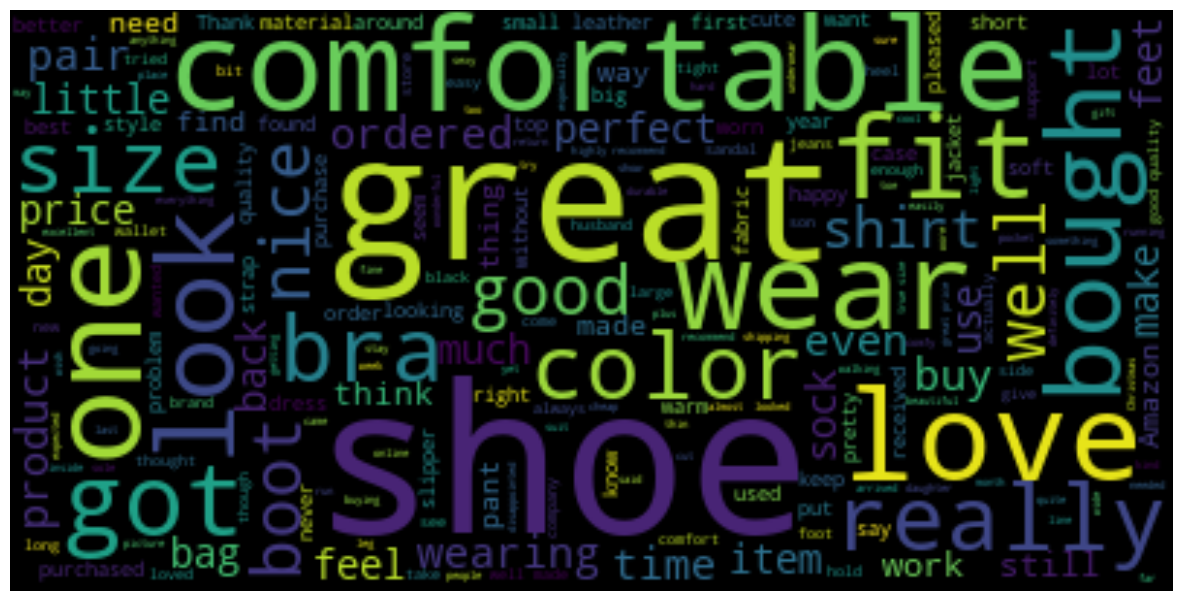

In [378]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(all_words_lemm)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Frequency distributions

In [379]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [382]:
words = nltk.word_tokenize(all_words_lemm)
fd = FreqDist(words)

fd.tabulate(10)

        The       great comfortable        They       shoes        like        size        wear        This        good 
       2711        1935        1716        1653        1629        1508        1384        1372        1332        1301 


In [383]:
top_10_words = fd.most_common(10)

fdist = pd.Series(dict(top_10_words))

In [384]:
import seaborn as sns

sns.set_theme(style = 'ticks')

<AxesSubplot: >

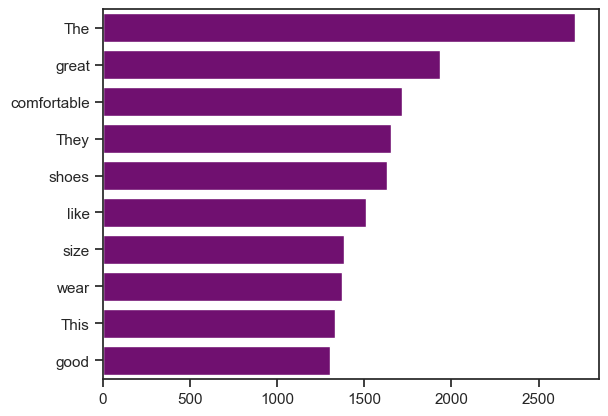

In [385]:
sns.barplot(y = fdist.index, x = fdist.values, color = 'purple')